## Covid19 Veri Analizi

Aylin ÖZKAN KELEŞ

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Veri seti büyük olduğundan Drive üstünden veri içeri alındı.

! gdown --id 1pXGMf5eNSATIsbrrOujeQJCr2o7UFxoM

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1pXGMf5eNSATIsbrrOujeQJCr2o7UFxoM
From (redirected): https://drive.google.com/uc?id=1pXGMf5eNSATIsbrrOujeQJCr2o7UFxoM&confirm=t&uuid=e5196f2e-1a30-4edb-bb4b-2030f5d46502
To: /content/metadata.csv
100% 1.65G/1.65G [00:15<00:00, 106MB/s]


In [3]:
covid = pd.read_csv("metadata.csv", low_memory=False)

In [4]:
covid.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


**Veri, Covid19 yayınları ile alakalı bilgileri içermektedir.

In [5]:
covid.describe()

,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


In [6]:
covid.shape

(1056660, 19)

-Veri çok büyük olduğu ve çalışmayı zorlaştırdığı için eksik veriler tespit edilip, eksik veri içeren satırlar silinecektir.

In [7]:
# Hangi sütunda kaç eksik veri var?
missing = covid.isnull().sum().sort_values(ascending=False)
print(missing)

mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
cord_uid                  0
source_x                  0
license                   0
dtype: int64


In [8]:
# Verileri temizleme
covid_clean = covid.dropna(subset=['title', 'abstract', 'publish_time']).copy()

In [9]:
covid_clean.shape

(819282, 19)

<Axes: title={'center': 'Yıllara Göre Yayın Sayısı'}, xlabel='Yıl', ylabel='Makale Sayısı'>

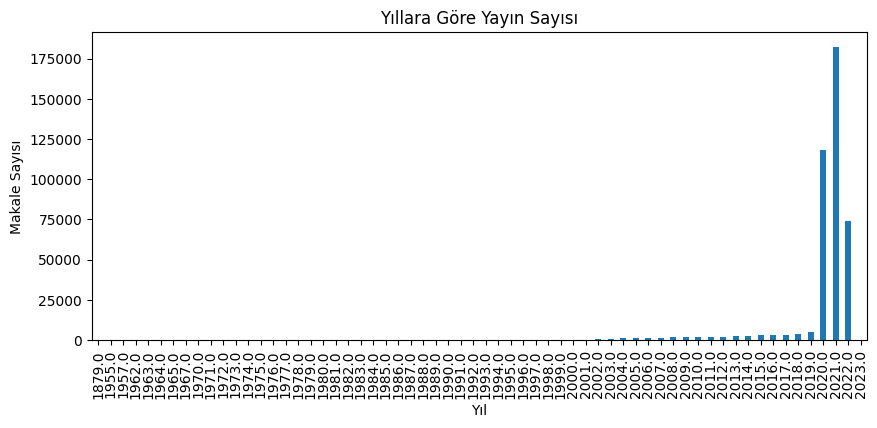

In [10]:
# Yıllara göre makale sayısını gruplama ve görselleştirme
covid_clean['publish_year'] = pd.to_datetime(covid_clean['publish_time'], errors='coerce').dt.year

covid_clean['publish_year'].value_counts().sort_index().plot(
    kind='bar', figsize=(10, 4), title="Yıllara Göre Yayın Sayısı", xlabel="Yıl", ylabel="Makale Sayısı")


<Axes: title={'center': 'En Çok Yayınlanan Dergiler'}, ylabel='journal'>

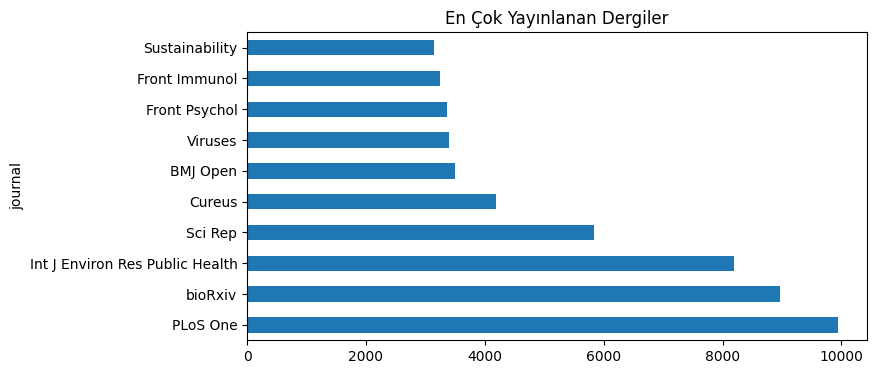

In [11]:
# En çok yayın yapan ilk 10 dergi
covid_clean['journal'].value_counts().head(10).plot(
    kind='barh', figsize=(8, 4), title="En Çok Yayınlanan Dergiler")

In [12]:
# Tarih sütununda yılları ayıklama
covid_clean['publish_year'] = pd.to_datetime(covid_clean['publish_time'], errors='coerce').dt.year

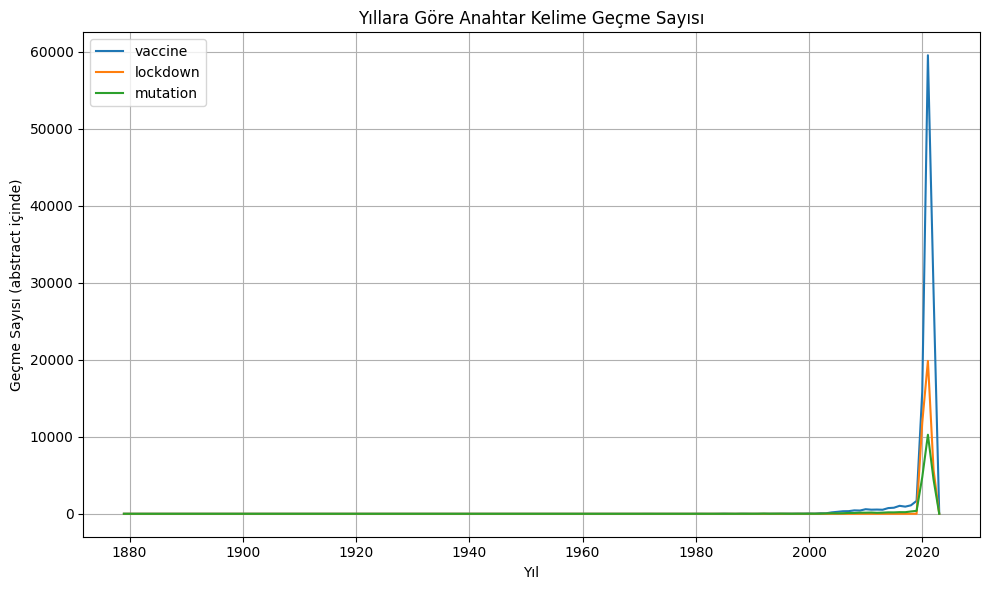

In [13]:
# Yıllara göre 'vaccine', 'lockdown', 'mutation' kelimelerinin trendi
keywords = ['vaccine', 'lockdown', 'mutation']

trend_data = {k: [] for k in keywords}
years = sorted(covid_clean['publish_year'].dropna().unique())

for year in years:
    yearly_df = covid_clean[covid_clean['publish_year'] == year]
    abstracts = " ".join(str(a).lower() for a in yearly_df['abstract'].dropna())

    for keyword in keywords:
        count = abstracts.count(keyword.lower())
        trend_data[keyword].append(count)

plt.figure(figsize=(10, 6))
for keyword in keywords:
    plt.plot(years, trend_data[keyword], label=keyword)

plt.title("Yıllara Göre Anahtar Kelime Geçme Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Geçme Sayısı (abstract içinde)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

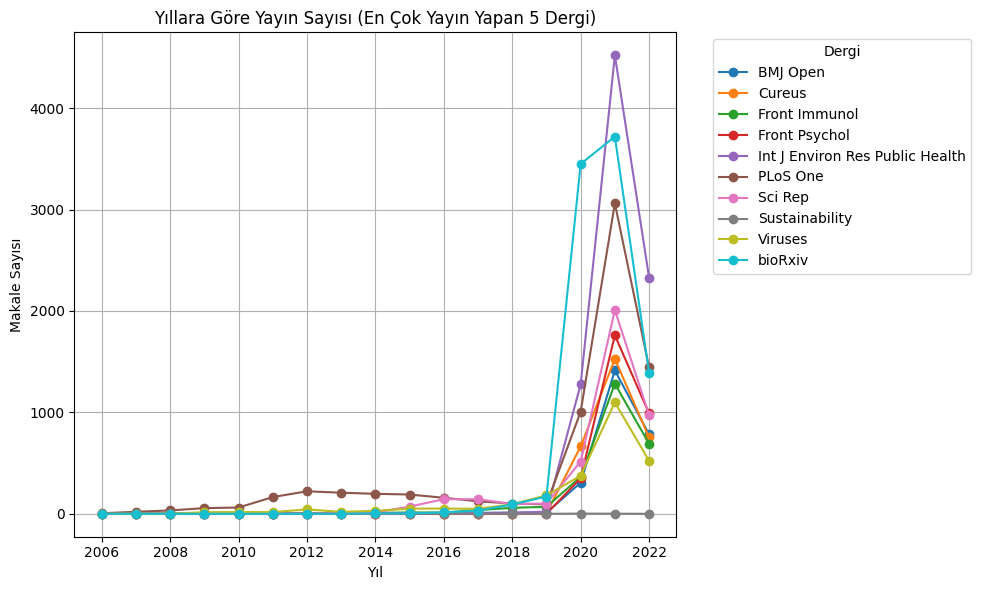

In [15]:
# Hangi dergiler ne zaman öne çıkmış? (En çok yayın yapan 10 dergi üzerinden)

top_journals = covid_clean['journal'].value_counts().head(10).index.tolist()

journal_trend = (
    covid_clean[covid_clean['journal'].isin(top_journals)]
    .groupby(['publish_year', 'journal'])
    .size()
    .unstack(fill_value=0))

journal_trend.plot(figsize=(10,6), marker='o')
plt.title("Yıllara Göre Yayın Sayısı (En Çok Yayın Yapan 5 Dergi)")
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.grid(True)
plt.legend(title="Dergi", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: title={'center': "'vaccine' kelimesi en çok geçen dergiler"}, ylabel='journal'>

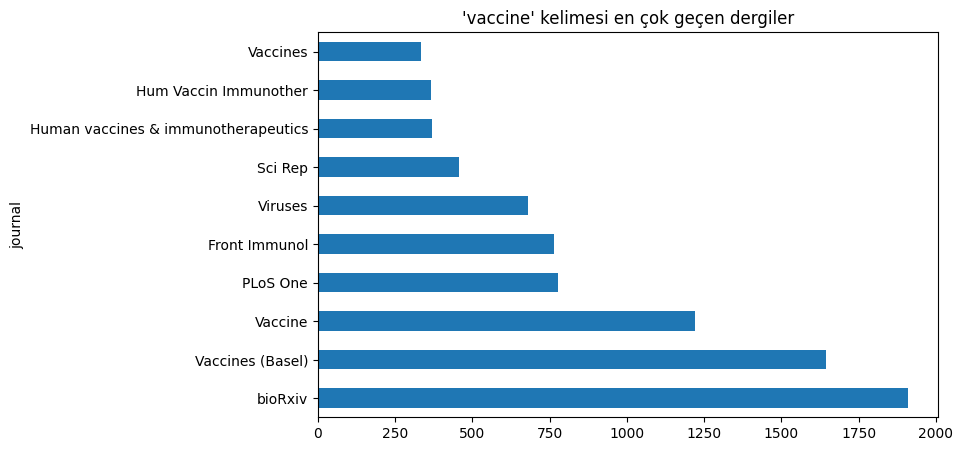

In [16]:
#Dergilere göre "vaccine" (aşı) kelimesinin dağılımı

keyword = "vaccine"

# Abstract'ında 'vaccine' geçenleri filtrele
mask = covid_clean['abstract'].str.contains(keyword, case=False, na=False)

# Bu makalelerdeki dergilere göre grupla
vaccine_journal_counts = covid_clean[mask]['journal'].value_counts().head(10)

vaccine_journal_counts.plot(kind='barh', title=f"'{keyword}' kelimesi en çok geçen dergiler", figsize=(8,5))

<Axes: title={'center': 'En Sık Geçen 20 Kelime'}, xlabel='Kelime'>

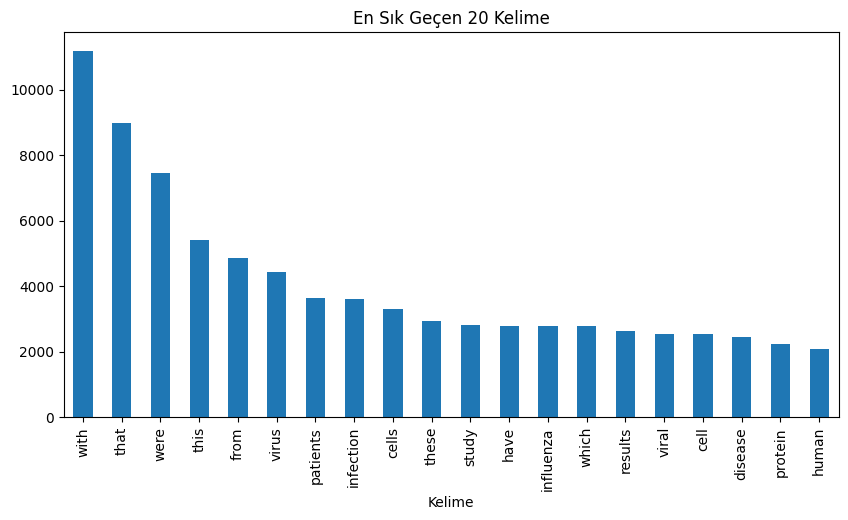

In [17]:
#En sık kullanılan kelimeler

from collections import Counter
import re

# Tüm abstract’ları birleştir
abstract_text = " ".join(covid_clean['abstract'].dropna().head(5000).str.lower())

# Noktalama ve sayıları temizle, kelimelere ayır
words = re.findall(r'\b[a-z]{4,}\b', abstract_text)  # en az 4 harfli kelimeler

word_freq = Counter(words).most_common(20)

pd.DataFrame(word_freq, columns=["Kelime", "Frekans"]).set_index("Kelime").plot(kind='bar', legend=False, title="En Sık Geçen 20 Kelime", figsize=(10,5))


In [19]:
# "Pandemic" kelimesi ilk ne zaman görülmüş?

pandemic_mask = covid_clean['abstract'].str.contains("pandemic", case=False, na=False)
pandemic_years = covid_clean[pandemic_mask]['publish_year']

print("Pandemic kelimesi ilk şu yıl geçmiş:", pandemic_years.min())

Pandemic kelimesi ilk şu yıl geçmiş: 1994.0


<Axes: title={'center': "Yıllara Göre 'variant' Kelimesi Geçme Sayısı"}, xlabel='publish_year'>

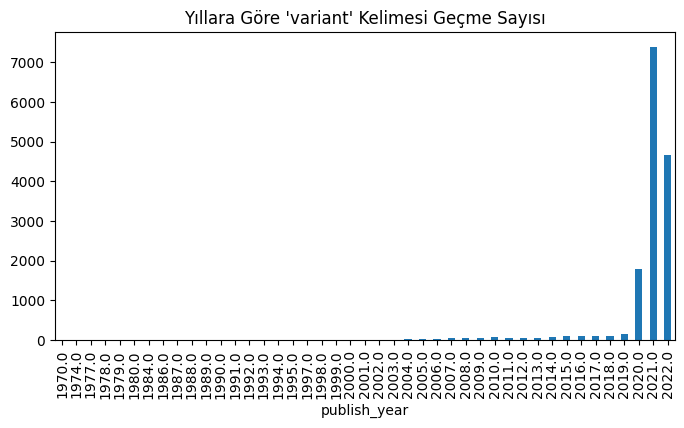

In [20]:
# "Variant" kavramı hangi yıllarda zirvede?

variant_mask = covid_clean['abstract'].str.contains("variant", case=False, na=False)
variant_years = covid_clean[variant_mask]['publish_year'].value_counts().sort_index()

variant_years.plot(kind='bar', title="Yıllara Göre 'variant' Kelimesi Geçme Sayısı", figsize=(8,4))